In [56]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
from alex_module import df_prepper
from alex_module import plotter

Load .csv 1 and combine with other 11, with `alex_module.df_prepper`

In [57]:
df = pd.read_csv('raw_data/all_energy_statistics1.csv')
df = df_prepper.csv_combiner(df,verbose=False)

In [58]:
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
89478,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
89479,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
89480,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
89481,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


# Features of the dataset:
- Country/ area
- Year
- Commodity transaction
- Unit
- Quantity
- Category

## Feature 1: Country

In [59]:
n = df['country_or_area'].nunique()

print(f'Number of unique country/ area values that appear: {n}')

Number of unique country/ area values that appear: 243


### Exploration of country appearances in the data 
- Which countries have the most and least data?
- What is the average amount of data points per country?
- Splitting countries into quartiles/ quintiles based on their data volume

In [60]:
print('Amount of times each country/ area appears in the data:\n'+'-'*50)
df['country_or_area'].value_counts()

Amount of times each country/ area appears in the data:
--------------------------------------------------


Germany                                     20422
United States                               19847
Poland                                      19802
Austria                                     17440
Romania                                     17357
                                            ...  
Antarctic Fisheries                            90
Pacific Islands (former)                       68
Yemen, Dem. (former)                           61
Yemen Arab Rep. (former)                       45
Commonwealth of Independent States (CIS)       16
Name: country_or_area, Length: 243, dtype: int64

Text(0.5, 1.0, 'Distribution of data points per country')

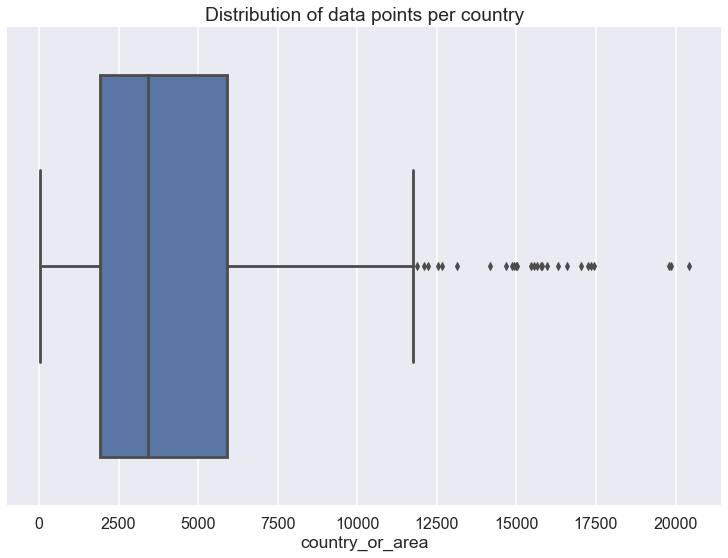

In [65]:
country_counts = df['country_or_area'].value_counts().to_frame()

fig = sns.boxplot(country_counts['country_or_area'])
fig.set_title('Distribution of data points per country')

In [66]:
print('Average number of data points per country: {}'.format(round(df['country_or_area'].value_counts().mean())))
print('Median number of data points per country: {}'.format(round(df['country_or_area'].value_counts().median())))

Average number of data points per country: 4895
Median number of data points per country: 3406


#### Quartiles -> putting the countries into 4 groups based on count of data points

In [67]:
country_counts['quartiles'] = pd.qcut(x=country_counts['country_or_area'],
                                      q=4,
                                     labels=['Q4','Q3','Q2','Q1'])

In [68]:
country_counts

,country_or_area,quartiles
Germany,20422,Q1
United States,19847,Q1
Poland,19802,Q1
Austria,17440,Q1
Romania,17357,Q1
...,...,...
Antarctic Fisheries,90,Q4
Pacific Islands (former),68,Q4
"Yemen, Dem. (former)",61,Q4
Yemen Arab Rep. (former),45,Q4


#### Average and median values per quartile

In [101]:
# Instantiating empty dataframe
d = {'Quartile':[''],'Average Data Points':[''],'Median Data Points':['']}
quartile_mean_and_medians = pd.DataFrame(d)

In [102]:
verbose=False

for quartile in ['Q1','Q2','Q3','Q4']:
    df_ = country_counts[country_counts['quartiles']==quartile]
    avg_data = round(df_['country_or_area'].mean())
    median_data = round(df_['country_or_area'].median())
    
    if verbose:
        print(f'{quartile} average count of data points: {avg_data}')
        print(f'{quartile} median count of data points: {median_data}')
        print('\n')

    d = {'Quartile':[quartile],'Average Data Points':[avg_data],'Median Data Points':[median_data]}
    d_ = pd.DataFrame(d)
    quartile_mean_and_medians = quartile_mean_and_medians.append(d_)

In [103]:
# Removing empty row I made when instantiating the empty dataframe (ugly method I know)
quartile_mean_and_medians = quartile_mean_and_medians.iloc[1:,:]

quartile_mean_and_medians.set_index('Quartile',inplace=True)

In [104]:
quartile_mean_and_medians

,Average Data Points,Median Data Points
Quartile,,
Q1,11538,11270
Q2,4417,4324
Q3,2627,2655
Q4,989,940


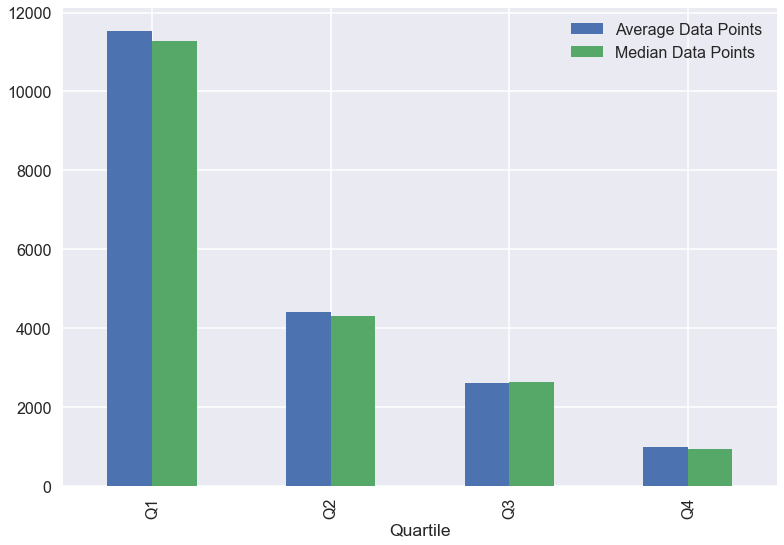

In [107]:
quartile_mean_and_medians.plot.bar()

# Plot the top 10 countries by datapoints

(To do)

In [14]:
# Top 10 dealers by data points
df['country_or_area'].value_counts(normalize=True)

Germany                                     0.017169
United States                               0.016685
Poland                                      0.016648
Austria                                     0.014662
Romania                                     0.014592
                                              ...   
Antarctic Fisheries                         0.000076
Pacific Islands (former)                    0.000057
Yemen, Dem. (former)                        0.000051
Yemen Arab Rep. (former)                    0.000038
Commonwealth of Independent States (CIS)    0.000013
Name: country_or_area, Length: 243, dtype: float64

## Group by:
#### Commodity_transaction

After loading in my combined dataframe, next steps are to:

- Create a groupby with `alex_module.df_groupby()`
- Flatten the groupby with `alex_module.df_groupby_flatten()`

In [8]:
df_groupby_commodity = df_prepper.df_groupby(df,
                                             cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                             cols_to_groupby=['country_or_area','year','commodity_transaction'],
                                             aggregate='sum')

df_groupby_commodity = df_prepper.df_groupby_flatten(df_groupby_commodity)
df_groupby_commodity

commodity_transaction,country_or_area,Additives and Oxygenates - Exports,Additives and Oxygenates - Imports,Additives and Oxygenates - Production,Additives and Oxygenates - Receipts from other sources,Additives and Oxygenates - Stock changes,Additives and Oxygenates - Total energy supply,Additives and Oxygenates - Transformation,Additives and Oxygenates - Transformation in oil refineries,Additives and Oxygenates - transfers and recycled products,...,White spirit and special boiling point industrial spirits - Transfers and recycled products,White spirit and special boiling point industrial spirits - Transformation,White spirit and special boiling point industrial spirits - Transformation in petrochemical plants,White spirit and special boiling point industrial spirits - consumption by other industries and construction,White spirit and special boiling point industrial spirits - final consumption,White spirit and special boiling point industrial spirits - production from plants,White spirit and special boiling point industrial spirits - production from refineries,Wind – Autoproducer,Wind – Main activity,animal waste - Transformation
year,,,,,,,,,,,,,,,,,,,,,
1990,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN
1991,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
1992,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1993,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN
1994,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Group by:
#### Category

In [9]:
df_groupby_category = df_prepper.df_groupby(df,
                                            cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                            cols_to_groupby=['country_or_area','year','category'],
                                            aggregate='sum')

df_groupby_category = df_prepper.df_groupby_flatten(df_groupby_category)
df_groupby_category

category,country_or_area,additives_and_oxygenates,animal_waste,anthracite,aviation_gasoline,bagasse,biodiesel,biogases,biogasoline,bitumen,...,refinery_gas,solar_electricity,sub_bituminous_coal,thermal_electricity,tide_wave_and_ocean_electricity,total_electricity,total_refinery_output,uranium,white_spirit_and_special_boiling_point_industrial_spirits,wind_electricity
year,,,,,,,,,,,,,,,,,,,,,
1990,Afghanistan,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,364.0,NaN,6937.0,NaN,NaN,84.0,NaN
1991,Afghanistan,NaN,NaN,NaN,12.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,325.0,NaN,6230.0,NaN,NaN,72.0,NaN
1992,Afghanistan,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,225.0,NaN,4744.0,NaN,NaN,44.0,NaN
1993,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,220.0,NaN,5770.0,NaN,NaN,40.0,NaN
1994,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,215.0,NaN,5696.0,NaN,NaN,36.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,Zimbabwe,NaN,NaN,2.2,2.0,3188.251900,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2840.1,NaN,75854.1,NaN,NaN,NaN,NaN
2011,Zimbabwe,NaN,NaN,5.8,2.0,2373.059141,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3975.4,NaN,81981.6,NaN,1400.0,NaN,NaN
2012,Zimbabwe,NaN,NaN,10.4,2.0,1557.218891,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3761.3,NaN,79901.9,NaN,NaN,NaN,NaN


## Group by:
#### Unit

In [10]:
df_groupby_unit = df_prepper.df_groupby(df,
                                        cols_to_keep=['country_or_area','commodity_transaction','year','unit','quantity','category'],
                                        cols_to_groupby=['country_or_area','year','unit'],
                                        aggregate='sum')

df_groupby_unit = df_prepper.df_groupby_flatten(df_groupby_unit)
df_groupby_unit

unit,country_or_area,"Cubic metres, thousand","Kilowatt-hours, million","Kilowatts, thousand",Metric Tons,"Metric tons, thousand",Terajoules
year,,,,,,,
1990,Afghanistan,3679.368000,8065.0,1976.0,NaN,1.094542e+06,3960729.0
1991,Afghanistan,3786.318000,7245.0,1976.0,NaN,8.042161e+05,56770.0
1992,Afghanistan,4028.724000,5447.0,1976.0,NaN,8.021577e+05,52551.0
1993,Afghanistan,4325.406000,6465.0,1976.0,NaN,1.092106e+06,3913929.0
1994,Afghanistan,4656.120000,6383.0,1976.0,NaN,8.020524e+05,48750.0
...,...,...,...,...,...,...,...
2010,Zimbabwe,111946.250685,84457.0,8448.0,NaN,3.793025e+04,633546.0
2011,Zimbabwe,114513.847837,91158.8,8448.0,1400.0,3.989046e+04,648702.0
2012,Zimbabwe,117320.963328,89050.5,8448.0,NaN,3.601022e+04,665190.0


## Plotting any of these flatted groupbys:

In [7]:
df_to_plot=df_groupby_unit[df_groupby_unit['country_or_area']=='United Kingdom'].copy()

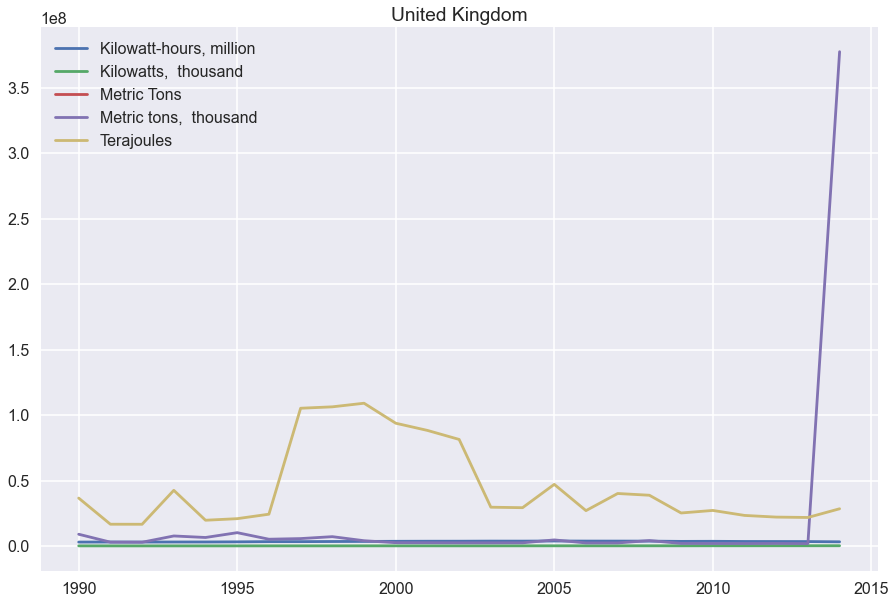

In [8]:
plotter.plot_from_flattened(df=df_to_plot,
                    x=df_to_plot.index,
                    y=df_to_plot.columns[2:],
                    index_as_x=True,
                    title='United Kingdom')

# Plotting 15 random countries

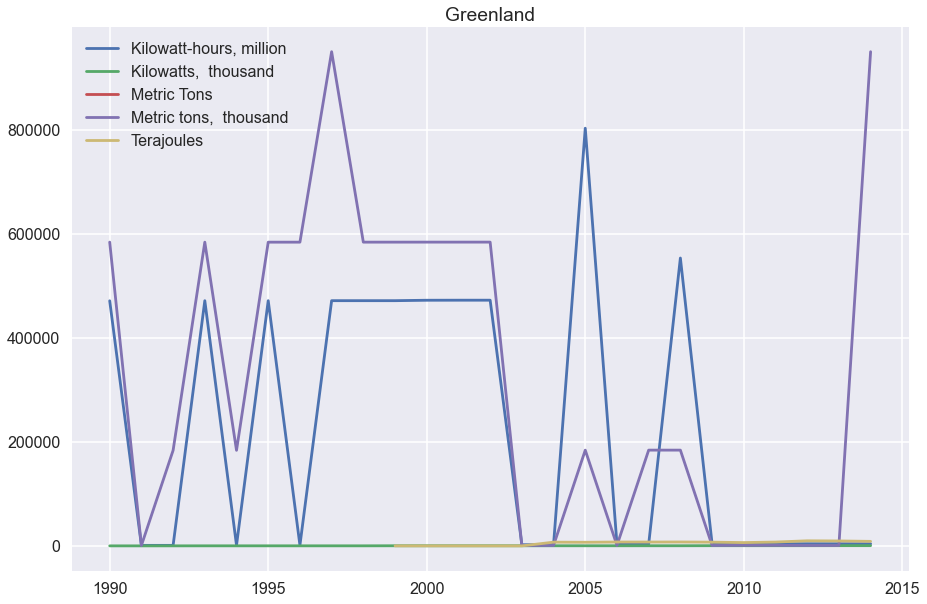

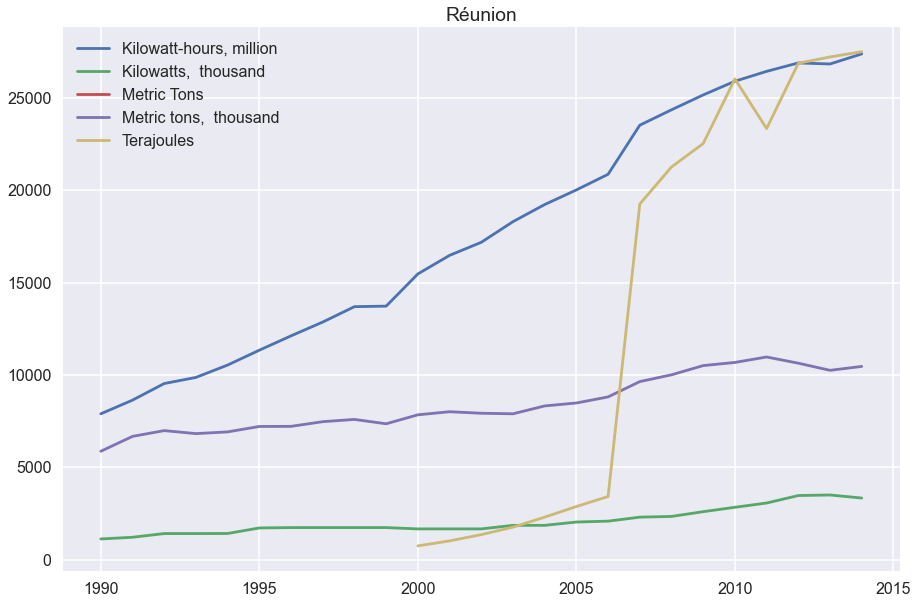

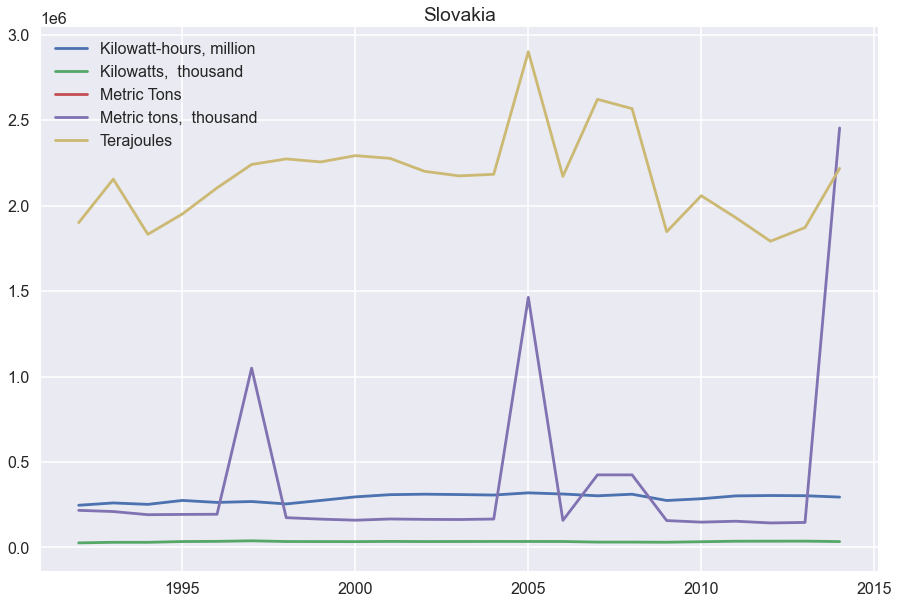

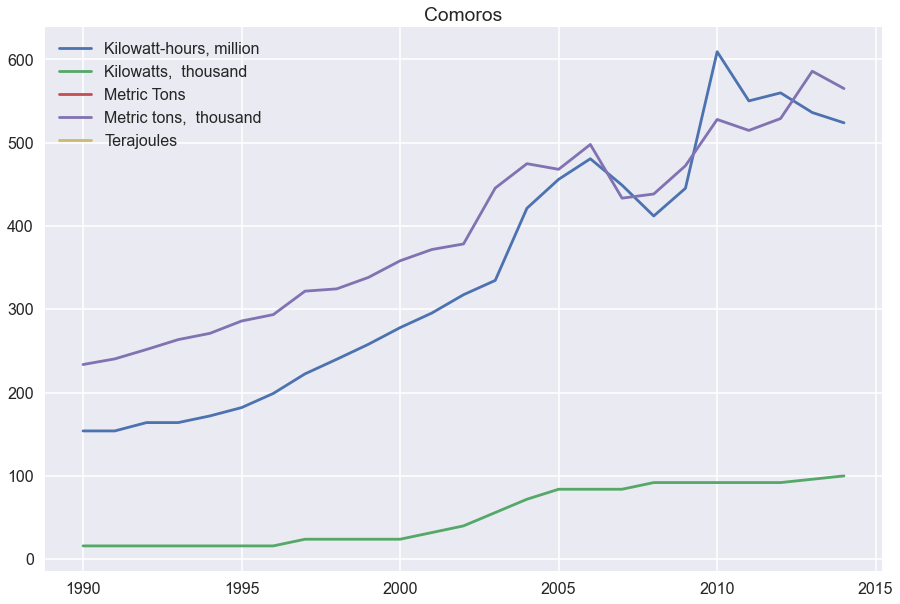

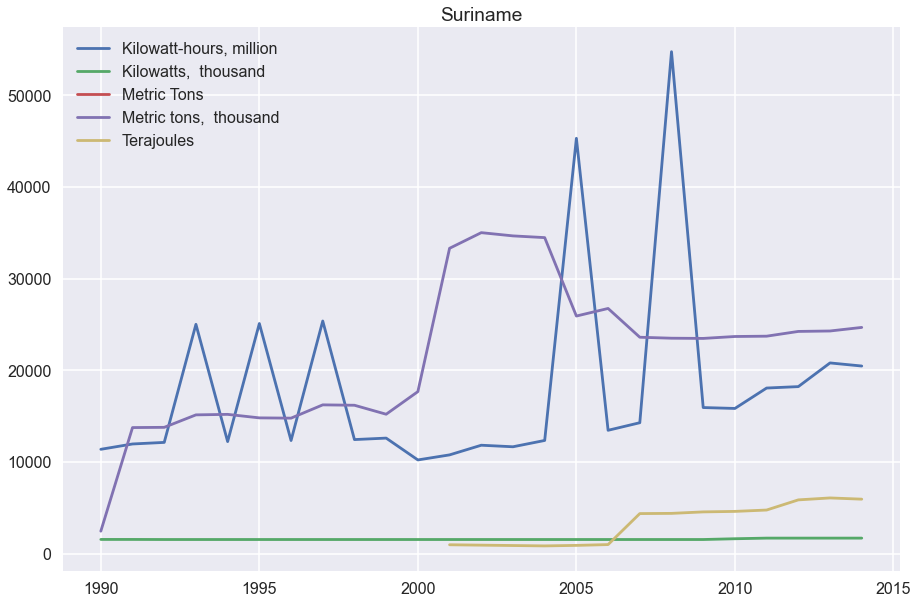

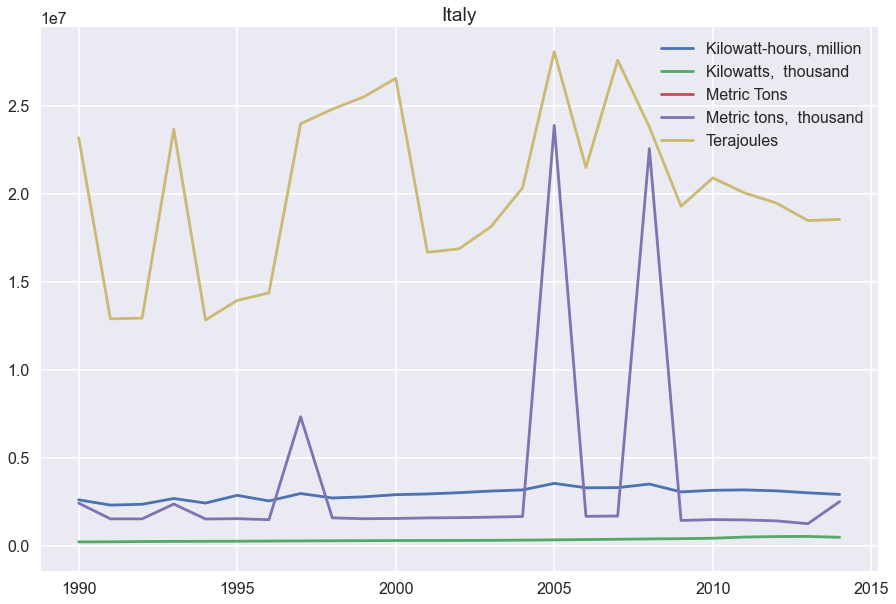

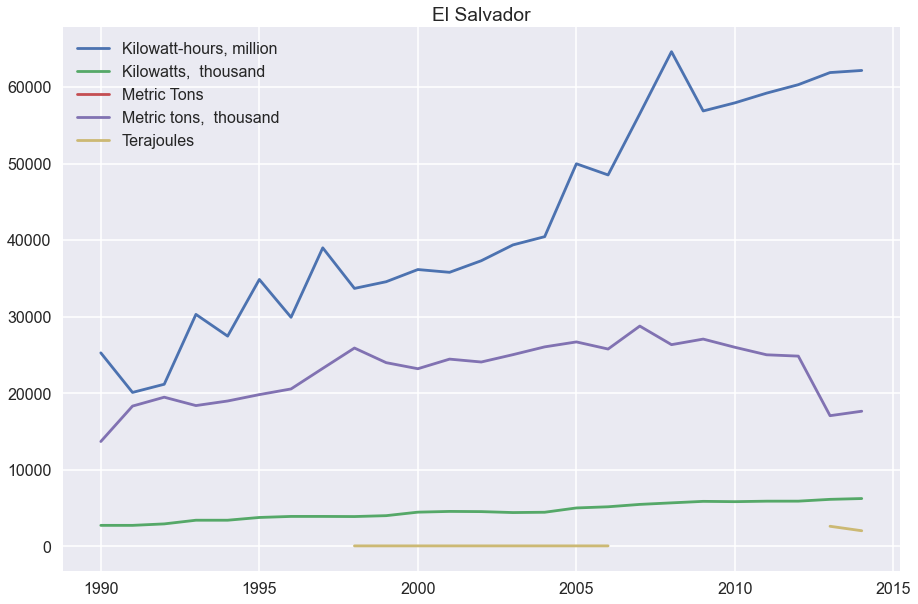

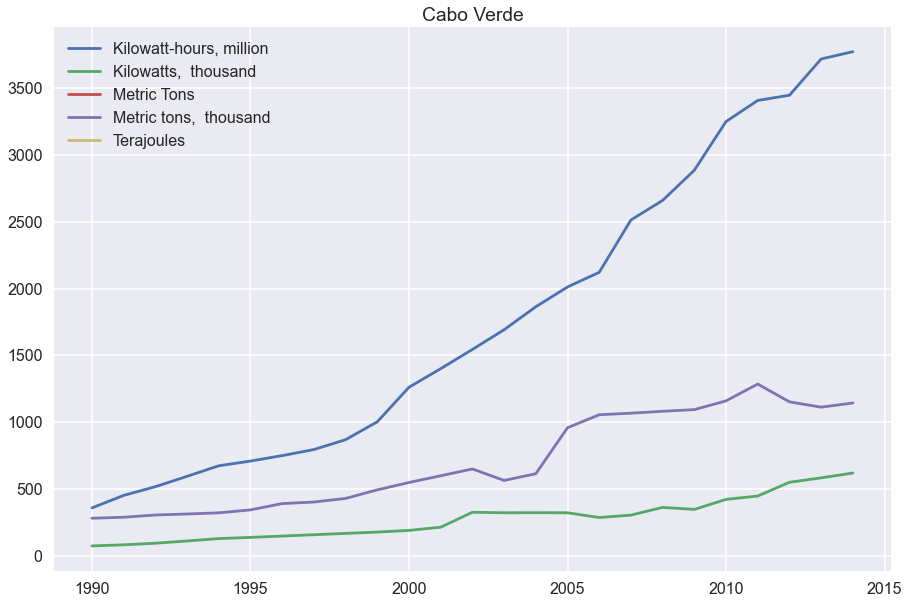

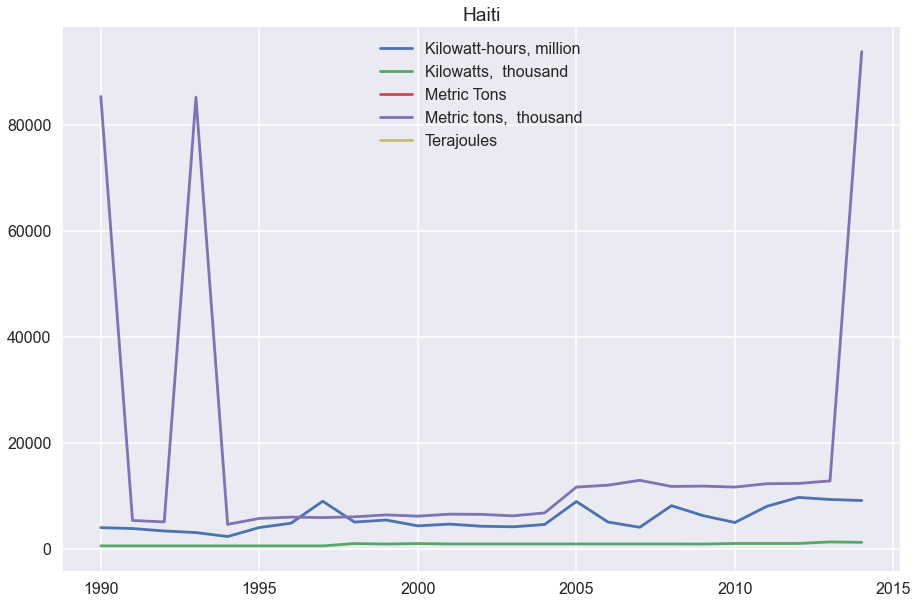

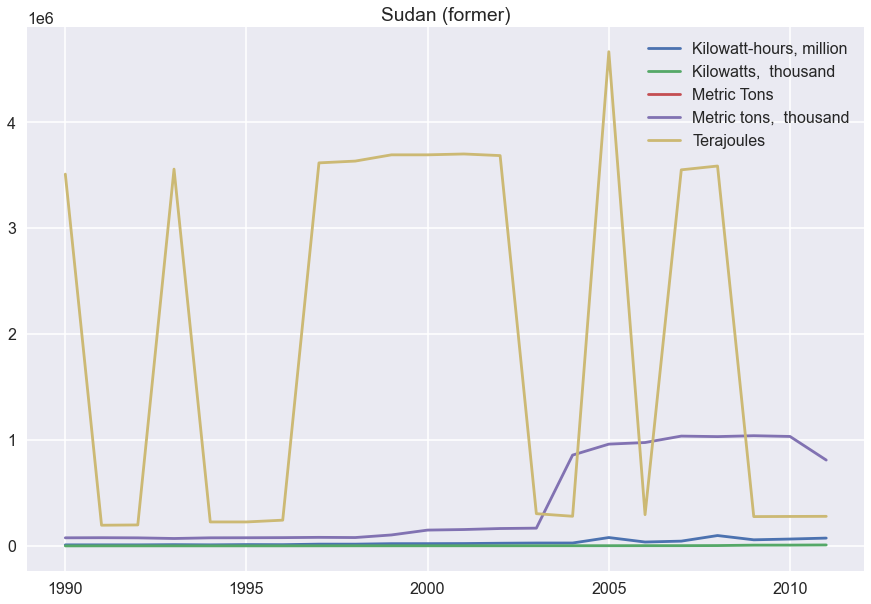

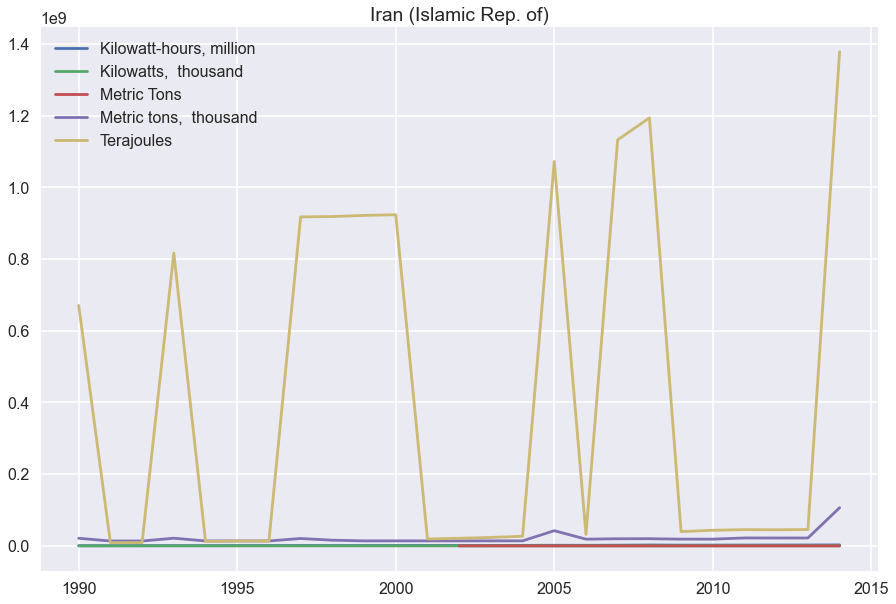

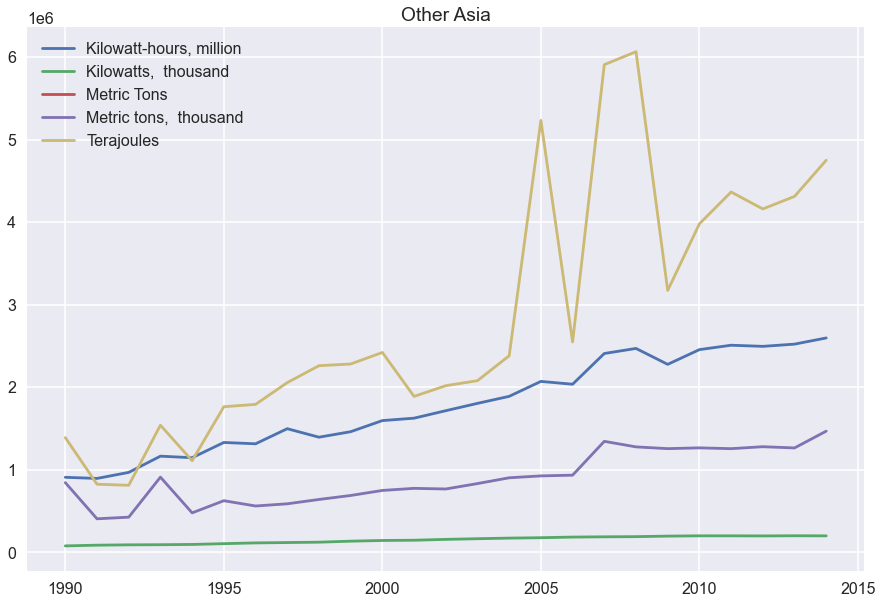

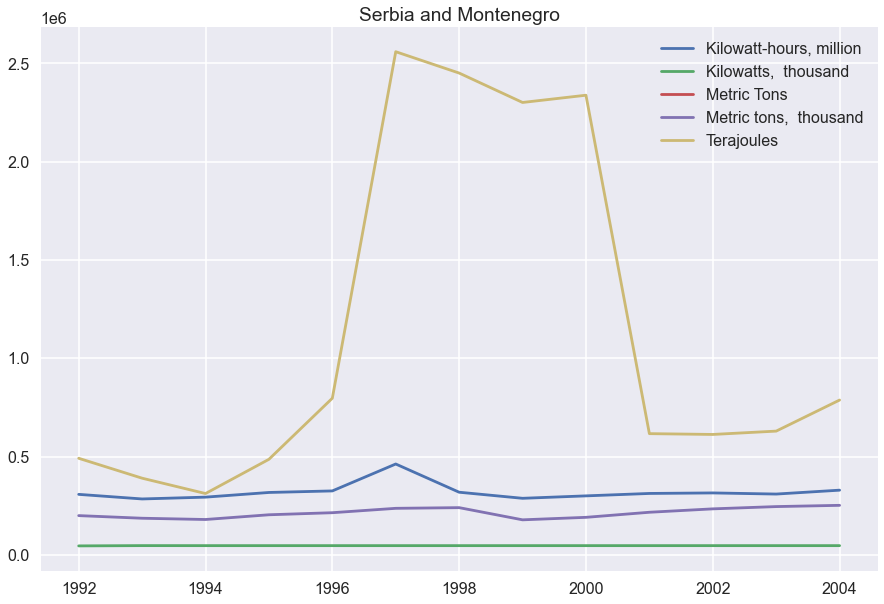

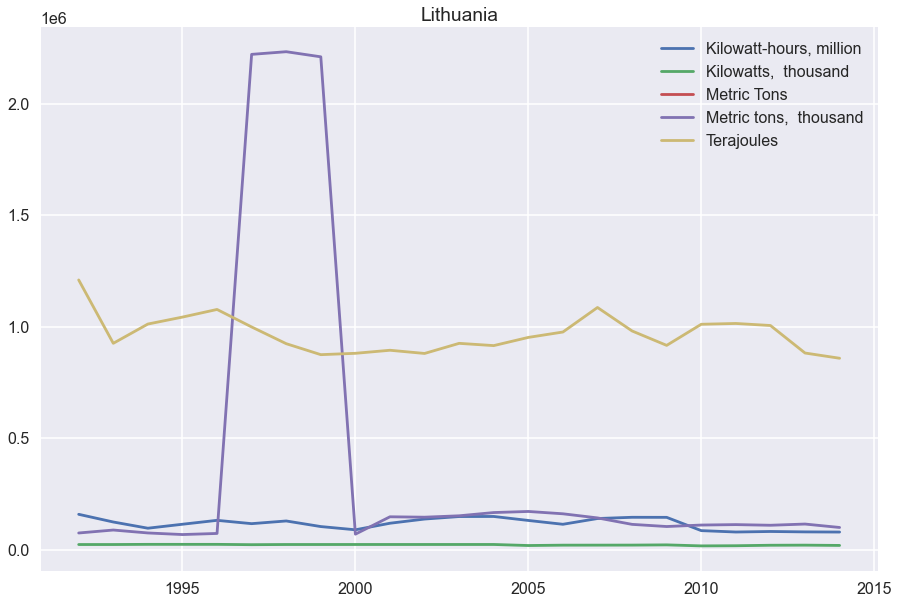

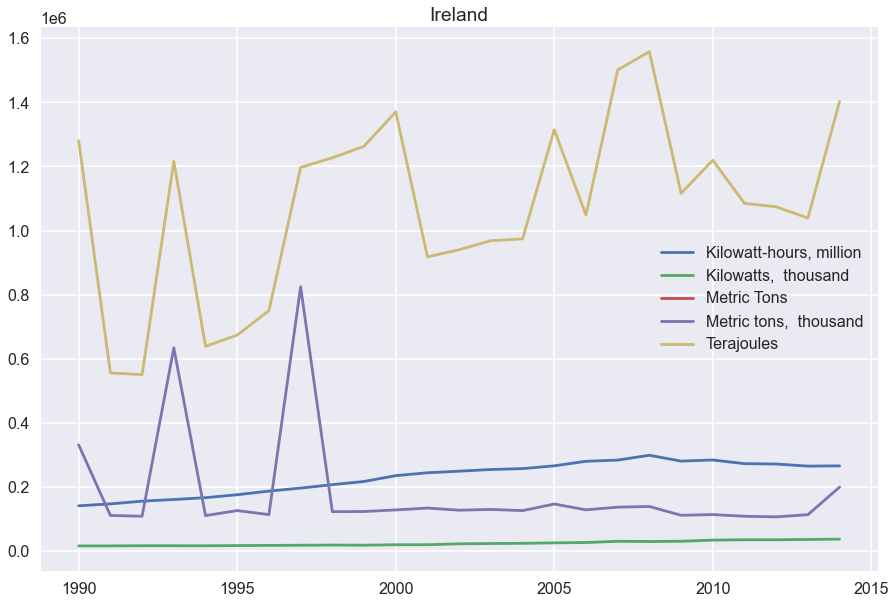

In [9]:
# Getting list of countries (removing duplicates)
country_list = df_groupby_unit['country_or_area'].to_list()
country_list = list(dict.fromkeys(country_list))

for i in np.arange(15): # Won't plot all as it makes the output 15MB and Jupyter throw a load of duplicate warnings. Best practice would be to save every graph to folder.
    country_to_plot = random.choice(country_list)
    df_to_plot=df_groupby_unit[df_groupby_unit['country_or_area']==country_to_plot].copy()
    
    plotter.plot_from_flattened(df=df_to_plot,
                    x=df_to_plot.index,
                    y=df_to_plot.columns[2:],
                    index_as_x=True,
                    title=country_to_plot)